In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load dataset
df = pd.read_csv('/content/Paisabazar.csv')

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
df.shape


(30752, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30752 entries, 0 to 30751
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        30752 non-null  int64  
 1   Customer_ID               30752 non-null  int64  
 2   Month                     30752 non-null  int64  
 3   Name                      30752 non-null  object 
 4   Age                       30752 non-null  float64
 5   SSN                       30752 non-null  float64
 6   Occupation                30752 non-null  object 
 7   Annual_Income             30752 non-null  float64
 8   Monthly_Inhand_Salary     30752 non-null  float64
 9   Num_Bank_Accounts         30752 non-null  float64
 10  Num_Credit_Card           30752 non-null  float64
 11  Interest_Rate             30752 non-null  float64
 12  Num_of_Loan               30752 non-null  float64
 13  Type_of_Loan              30752 non-null  object 
 14  Delay_

In [ ]:
#duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
#dataset describe
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,30752.000000,30752.000000,30752.000000,30752.000000,3.075200e+04,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000
mean,28695.500000,25911.427419,4.500000,33.293900,4.965163e+08,51452.338896,4272.803815,5.342157,5.542176,14.353538,3.536681,20.983578,13.248179,10.340916,5.803525,1405.231834,32.313763,222.971547,109.741482,56.251402,394.220171
std,13316.222867,14403.521607,2.291325,10.743015,2.923992e+08,38753.552423,3215.873967,2.633819,2.056622,8.770756,2.430970,14.588513,6.262072,6.560260,3.914009,1166.272792,5.143613,99.014261,135.007678,39.880313,202.734875
min,5634.000000,1006.000000,1.000000,14.000000,6.304420e+05,7006.520000,333.596667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.230000,20.000000,1.000000,0.000000,0.000000,0.103402
25%,17164.750000,13938.750000,2.750000,25.000000,2.399003e+08,19653.458750,1659.141667,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.310000,3.000000,541.220000,28.039075,148.000000,29.765763,28.198631,268.576096
50%,28695.500000,25455.000000,4.500000,33.000000,4.905724e+08,38006.490000,3156.119167,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.230000,5.000000,1124.765000,32.330151,221.000000,66.900526,46.350929,335.152891
75%,40226.250000,38617.250000,6.250000,42.000000,7.517744e+08,73088.410000,6078.748333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.540000,9.000000,1878.490000,36.564428,304.000000,151.978850,72.443600,465.412448
max,51757.000000,50992.000000,8.000000,56.000000,9.999573e+08,179987.280000,14978.336667,10.000000,11.000000,34.000000,9.000000,62.000000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1705.000000,434.191089,1183.930696


In [ ]:
#check unique values for each variable
df.nunique()

,0
ID,30752
Customer_ID,3844
Month,8
Name,3589
Age,43
SSN,3844
Occupation,15
Annual_Income,3843
Monthly_Inhand_Salary,4070
Num_Bank_Accounts,11


In [ ]:
#data wrangling
#write your code to make your dataset analysis ready
df_copy = df.copy()

#drop unnecessary columns
drop_columns = ['ID', 'Customer_ID', 'Name', 'SSN']
df.drop(columns = drop_columns, inplace = True)

#convert data types
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype('int64')
df['Age'] = df['Age'].astype('int64')
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype('int64')

#round numerical values
df = df.round(2)

In [ ]:
#feature engineering
#1. Debt to income ratio
df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']

#2. Credit card Utilization score
df['Credit_Card_Utilization_Score'] = df['Credit_Utilization_Ratio'] * df['Num_Credit_Card']

#3. Credit Mix score
credit_mix_mapping = {'Bad': 0, 'Standard': 1, 'Good': 2}
df['Credit_Mix_Score'] = df['Credit_Mix'].map(credit_mix_mapping)


#4. Payment Delay Score
df['Payment_Delay_Score'] = df['Num_of_Delayed_Payment'] * df['Delay_from_due_date']

### What all manipulations have you done and insights you found??

### Data Manipulations :
1. Removed Irrelevant Columns
2. Data type conversion
3. Rounded Numerical Values
4. Feature Engineering

### Insights found
- better data quality
- Impact of Debt to Income Ratio
- Credit Utillisation and Risk
- Delayed Payment Behaviour

### 4. Data Visualization, storytelling and experimenting with charts, : Understand the relationships between variables

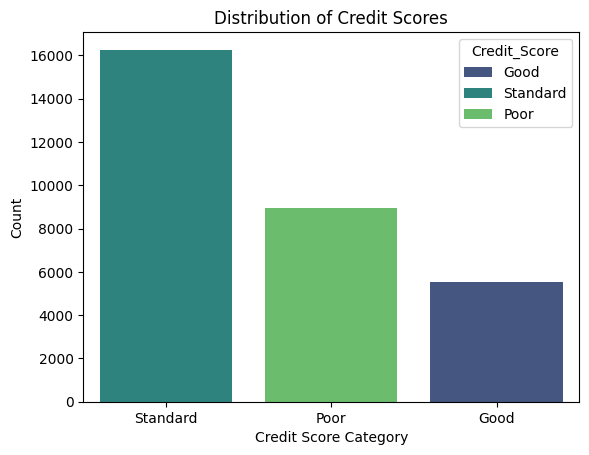

In [ ]:
#chart 1 - Distribution of credit scores
#create count plot for credit score distribution
sns.countplot(x = df['Credit_Score'], hue = df['Credit_Score'], palette = 'viridis', order = df['Credit_Score'].value_counts().index)
#Set labels and title
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score Category')
plt.ylabel('Count')
#show plot
plt.show()

####  1. Why did you pick the specify chart?
- A count plot is ideal for categorical variables as it visually represents the frequency distribution of different credit scores

2. Wat is/are the insights found from the chart?
- The chart highlights that one credit score category is significantly more frequent than others, indicating a class imbalance in the dataset

- This imbalance suggests that the dataset is skewed toward "Standard" category, which could impact predictive modelling.


3. Will the gained insights help creating a positive business impact?
- are there any insights that lead to negative growth?, justify the specific reason

- understanding the distribution is crucial for predictive modelling
- The imbalance may lead to biased model predictions, which could negatively impact risk assesment for loans.
- addresing this imbalance using techiniques like resampling, or class weighting can improve credit risk management and model fairness

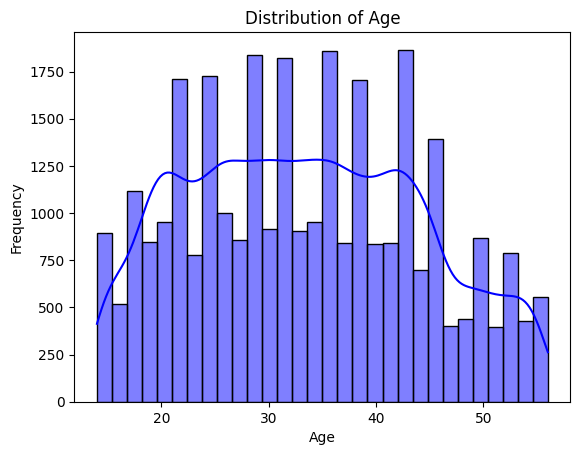

In [ ]:
#chart 2 ; Distribution of Age
#create histogram for Age distribution
sns.histplot(df['Age'], bins = 30, kde = True, color = 'blue')

#set labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#show plot
plt.show()

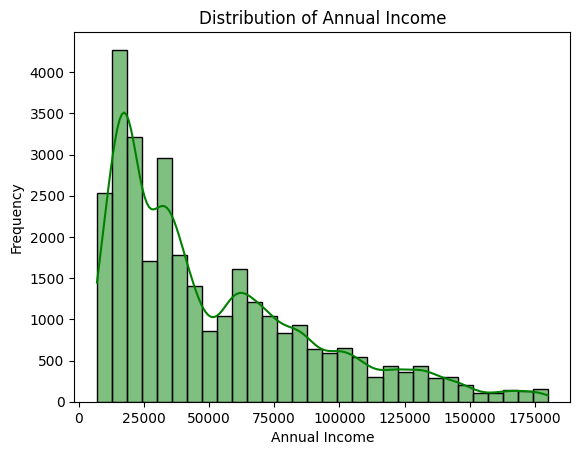

In [ ]:
#chart- 3 Annual Income Distribution
#create histogram for Annual Income Distribution

sns.histplot(df['Annual_Income'], bins = 30, kde = True, color = 'green')

#set labels and title
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

#show plot
plt.show()

## chart 4 - credit Utillization Ratio Distribution
#create histogram for credit Utillization ratio distribution


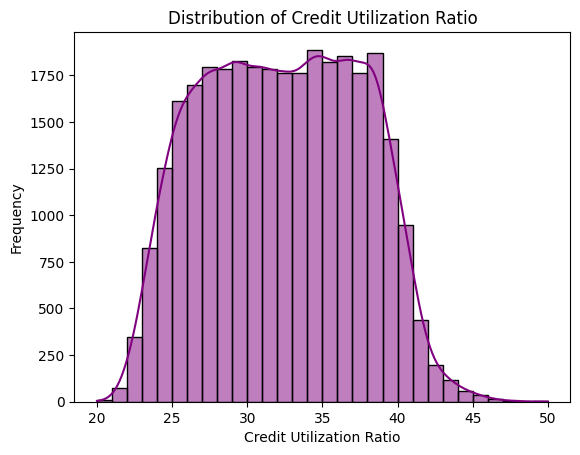

In [ ]:
#Chart 4- Credit Histogram for credit Utillization ratio distribution
sns.histplot(df['Credit_Utilization_Ratio'], bins = 30, kde = True, color = 'purple')

#set labels and title
plt.title('Distribution of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Frequency')

#show plot
plt.show()


1. why did you pick the specific chart?
- a histogram helps in understanding how customers use their available credit, which is a key indictor of credit worthiness and financial behaviour

2. what is/are the insights(s) found from the chart?
- most customers have a credit utillization ratio within 25-40 range
- A portion of customers exhibits high credit utillization which may indicate financial stress or over-reliance on credit
- A lower utillization ratio is generally linked to better credit scores and responsible financial behaviour

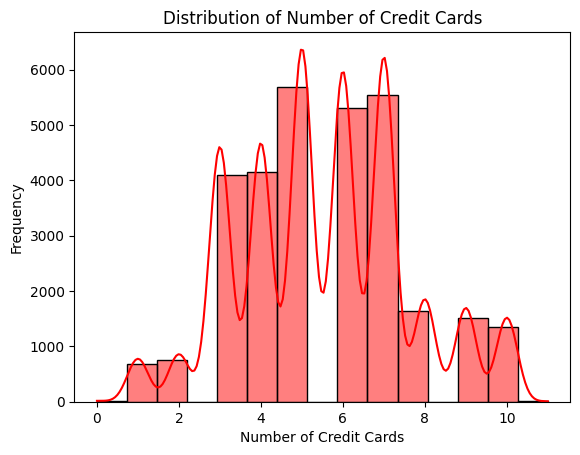

In [ ]:
#chart 5 - Number of credit cards distribution
#create histogram for number of credit cards distribution
sns.histplot(df['Num_Credit_Card'], bins = 15, kde = True, color = 'red')

#set labels and title
plt.title('Distribution of Number of Credit Cards')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Frequency')

#show plot
plt.show()

1. Why did you pick the specific chart??
- A histogram is ideal for showing how many credit cards customers typically hold and understanding their credit behaviour

2. what is/are the insights found from the chart?
- the majority of customers have a small number of credit cards, indicating conservative credit usage.

3. will the gained insights help creating a positive business impact?



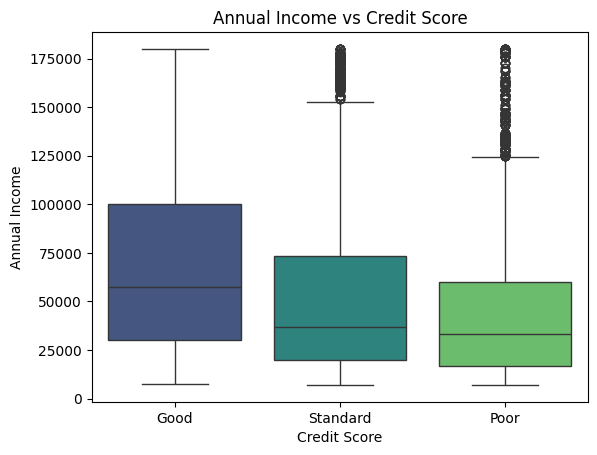

In [ ]:
#chart 9 - annual income vc credit score
#create boxplot for annual income across different credit score categories
sns.boxplot(x= 'Credit_Score', y = "Annual_Income", data = df, palette = 'viridis')

#set label and title
plt.title('Annual Income vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')

#show plot
plt.show()




## 5. Solution to Business Objective

- What do you sugest the client to achieve business Objective

- Explan briefly

- to help the client achieve their business objective of improving credit risk assesment and financial decision making, the following strategies are recommened

- enhace credit scoring models
- Targeted Loan Offers
- FInancial Literacy programs
- Risk-Based Interest Rates
- Debt Management Support
- Proactive Credit Monitoring